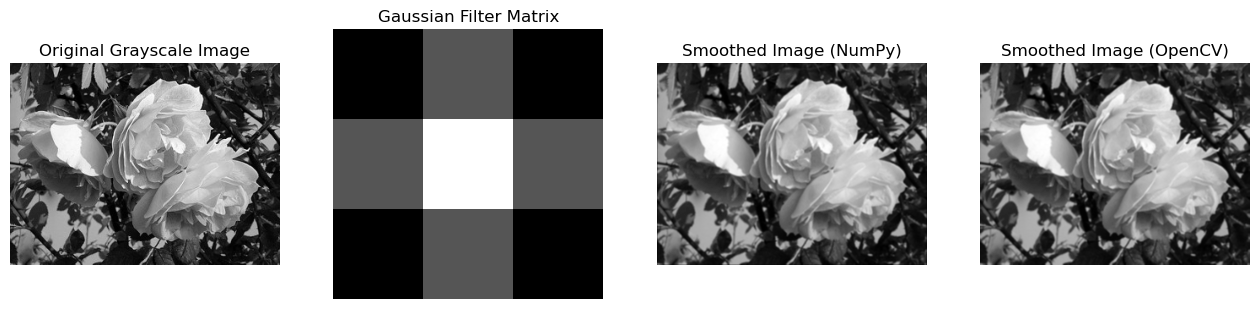

In [3]:
# Grayscale Image Processing with Gaussian Filter
# -------------------------------------------------
# This program demonstrates the process of smoothing a grayscale image using a Gaussian filter.
# It uses two methods to perform the convolution:
# 1. Using NumPy (manual convolution)
# 2. Using OpenCV's built-in function 'filter2D'
#
# The program first converts a color image to grayscale and then applies Gaussian filtering to smooth the image.
# The Gaussian filter is defined as a 3x3 matrix and is normalized by dividing each element by 16.
# After applying the Gaussian filter to the grayscale image, the result is displayed along with:
# 1. The original grayscale image
# 2. The Gaussian filter matrix itself
# 3. The smoothed image using NumPy's convolution
# 4. The smoothed image using OpenCV's 'filter2D'
#
# The images are displayed using Matplotlib, showing the following:
# 1. Original Grayscale Image
# 2. Gaussian Filter Matrix
# 3. Smoothed Image using NumPy's Convolution
# 4. Smoothed Image using OpenCV's Convolution
#
# Libraries used:
# - cv2 (OpenCV): For image reading, conversion, and convolution
# - numpy: For matrix operations and convolution
# - matplotlib: For displaying images
#
# The steps of the program:
# 1. Load an image and convert it to grayscale.
# 2. Define a Gaussian filter kernel.
# 3. Perform convolution on the grayscale image using both NumPy and OpenCV.
# 4. Display the original image, filter matrix, and the results of the convolution.

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images and the Gaussian Kernel
def display_images(original, gaussian_filter, smoothed_gray_numpy, smoothed_gray_opencv, title_original, title_gaussian_filter, title_smoothed_numpy, title_smoothed_opencv):
    plt.figure(figsize=(16, 6))

    # Display Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')  # Original image in grayscale
    plt.title(title_original)
    plt.axis('off')

    # Display Gaussian Filter as Matrix
    plt.subplot(1, 4, 2)
    plt.imshow(gaussian_filter, cmap='gray')  # Display Gaussian filter matrix as an image
    plt.title(title_gaussian_filter)
    plt.axis('off')

    # Display Smoothed Image using NumPy Convolution
    plt.subplot(1, 4, 3)
    plt.imshow(smoothed_gray_numpy, cmap='gray')
    plt.title(title_smoothed_numpy)
    plt.axis('off')

    # Display Smoothed Image using OpenCV filter2D
    plt.subplot(1, 4, 4)
    plt.imshow(smoothed_gray_opencv, cmap='gray')
    plt.title(title_smoothed_opencv)
    plt.axis('off')

    plt.show()  # Show the images

# Define kernel (Gaussian 3x3 kernel)
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32)

# Normalize the kernel by dividing by 16
gaussian_filter /= 16

# Function to perform convolution using NumPy
def convolve2d(image, kernel):
    """Convolve the image with the kernel using NumPy."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an empty output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output_image[i, j] = np.sum(region * kernel)  # Convolution operation

    return output_image

# ------------ Load the Color Image ------------- #
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ------------ Apply Convolution using NumPy ------------ #
# Apply convolution using NumPy
smoothed_gray_numpy = convolve2d(image_gray, gaussian_filter)

# ------------ Apply Convolution using OpenCV ------------ #
# Apply convolution using OpenCV (cv2.filter2D)
smoothed_gray_opencv = cv2.filter2D(image_gray, -1, gaussian_filter)

# ------------ Display Results ------------ #
# Display the original image, Gaussian filter, and results of smoothing
display_images(image_gray, gaussian_filter, smoothed_gray_numpy, smoothed_gray_opencv,
               'Original Grayscale Image', 'Gaussian Filter Matrix', 'Smoothed Image (NumPy)', 'Smoothed Image (OpenCV)')
